# Best-Model: Gradient Boosting

In [54]:
import pandas as pd
import numpy as np

df = pd.read_csv("teen_phone_addiction_dataset.csv")
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

# Best Model- Gradient Boosting

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Features
numeric_features = ['Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
                    'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level',
                    'Self_Esteem', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
                    'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
                    'Family_Communication', 'Weekend_Usage_Hours']
categorical_features = ['Gender', 'Phone_Usage_Purpose']
ordinal_features = ['School_Grade']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('ord', OrdinalEncoder(categories=[['7th','8th','9th','10th','11th','12th']]), ordinal_features)
])

# Gradient Boosting Model
gb_model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

# Pipeline
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gb_model)
])

X = df.drop(['Addiction_Level'], axis=1)

# Target variable
bins = [0, 3, 7, 10]       # adjust based on your data
labels = ['Low', 'Medium', 'High']

y = pd.cut(df['Addiction_Level'], bins=bins, labels=labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Fit pipeline on training data 
gb_pipeline.fit(X_train, y_train) 

# Save the pipeline 
joblib.dump(gb_pipeline, 'gb_model.joblib') 
print("Pipeline saved successfully!")

Pipeline saved successfully!


### 1. Preprocessing

- numeric_features: Scaled using StandardScaler.

- categorical_features: One-hot encoded with OneHotEncoder.

- ordinal_features: Encoded as ordered numbers using OrdinalEncoder.

- ColumnTransformer combines these preprocessing steps.

### 2. Model

- GradientBoostingClassifier with 300 trees, learning rate 0.05, max depth 3.

### 3. Pipeline

- Chains preprocessing and model so that fit and predict handle raw data automatically.

### 4. Target

- Addiction_Level is binned into categories Low, Medium, High using pd.cut.

### 5. Training & Saving

- Splits data into training/testing sets.

- Fits pipeline on training data.

- Saves pipeline with joblib so you can load it later for predictions without manual preprocessing.

- A file gb_model.joblib containing the full pipeline (preprocessing + trained model).

In [61]:
import pandas as pd

# Load pipeline
loaded_model = joblib.load('gb_model.joblib')

# Collect input from the user
user_input = {
    'Age': int(input("Enter Age: ")),
    'Daily_Usage_Hours': float(input("Enter Daily Usage Hours: ")),
    'Sleep_Hours': float(input("Enter Sleep Hours: ")),
    'Academic_Performance': int(input("Enter Academic Performance (1-100): ")),
    'Social_Interactions': int(input("Enter Social Interactions (scale 1-10): ")),
    'Exercise_Hours': float(input("Enter Exercise Hours: ")),
    'Anxiety_Level': int(input("Enter Anxiety Level (scale 1-10): ")),
    'Depression_Level': int(input("Enter Depression Level (scale 1-10): ")),
    'Self_Esteem': int(input("Enter Self Esteem Level (scale 1-10): ")),
    'Phone_Checks_Per_Day': int(input("Enter Phone Checks Per Day: ")),
    'Apps_Used_Daily': int(input("Enter Number of Apps Used Daily: ")),
    'Time_on_Social_Media': float(input("Enter Time on Social Media (hours): ")),
    'Time_on_Gaming': float(input("Enter Time on Gaming (hours): ")),
    'Time_on_Education': float(input("Enter Time on Education (hours): ")),
    'Family_Communication': int(input("Enter Family Communication (scale 1-10): ")),
    'Weekend_Usage_Hours': float(input("Enter Weekend Usage Hours: ")),
    'Gender': input("Enter Gender (Male/Female/Other): "),
    'Phone_Usage_Purpose': input("Enter Phone Usage Purpose (Browsing/Education/Social Media/Gaming/Other): "),
    'School_Grade': input("Enter School Grade (7th-12th): ")
}

# Convert to DataFrame
new_data = pd.DataFrame([user_input])

# Predict
y_pred_new = loaded_model.predict(new_data)
y_pred_proba_new = loaded_model.predict_proba(new_data)

print("Predicted Class:", y_pred_new)
print("The addiction level is: ", y_pred_new)
print("Prediction Probabilities:", y_pred_proba_new)

Enter Age:  19
Enter Daily Usage Hours:  4
Enter Sleep Hours:  3
Enter Academic Performance (1-100):  6
Enter Social Interactions (scale 1-10):  4
Enter Exercise Hours:  3
Enter Anxiety Level (scale 1-10):  5
Enter Depression Level (scale 1-10):  3
Enter Self Esteem Level (scale 1-10):  5
Enter Phone Checks Per Day:  6
Enter Number of Apps Used Daily:  4
Enter Time on Social Media (hours):  3
Enter Time on Gaming (hours):  6
Enter Time on Education (hours):  4
Enter Family Communication (scale 1-10):  6
Enter Weekend Usage Hours:  4
Enter Gender (Male/Female/Other):  male
Enter Phone Usage Purpose (Browsing/Education/Social Media/Gaming/Other):  gaming
Enter School Grade (7th-12th):  9th


Predicted Class: ['High']
The addiction level is:  ['High']
Prediction Probabilities: [[9.97408271e-01 4.58031812e-06 2.58714840e-03]]


Predicted Class: ['High']
The addiction level is:  ['High']
Prediction Probabilities: [[9.99836168e-01 1.15823945e-06 1.62673941e-04]]


1. Load the trained pipeline
- Loads the entire pipeline you saved earlier.

- This includes preprocessing (scaling, encoding) and the Gradient Boosting model.

- You can use this directly for predictions on new data.

2. Collect input from the user
- Prompts the user to enter values for each feature your model expects.

- Ensures numeric columns are converted to int or float.

- Collects categorical values (like Gender, Phone_Usage_Purpose, School_Grade) as strings.

3. Convert input to DataFrame
- Converts the dictionary into a single-row DataFrame.

- The model expects a DataFrame with the same feature names as it was trained on.

4. Make predictions
- predict() → returns the predicted class (e.g., 'Low', 'Medium', 'High' addiction).

- predict_proba() → returns the probabilities for each class (e.g., [0.2, 0.5, 0.3] means 20% Low, 50% Medium, 30% High).

- The pipeline automatically applies scaling and encoding to your new input before prediction.

5. Print results
- Displays what the model predicts.

✅ Key points:

- The code interactively collects input for all features.

- The pipeline handles all preprocessing automatically.

- Output includes predicted class and class probabilities.

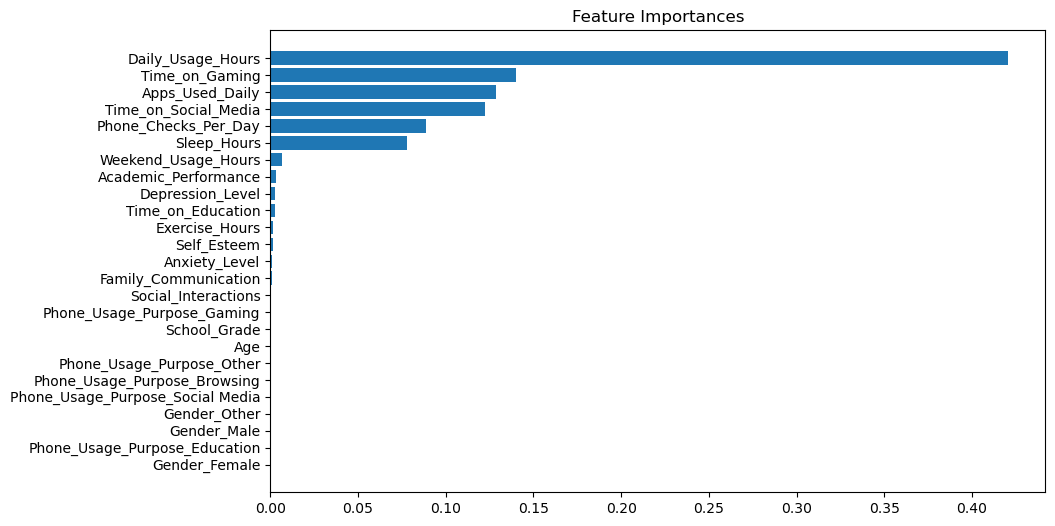

In [63]:
import matplotlib.pyplot as plt

# Assuming gb_model is your trained GradientBoostingClassifier
importances = gb_model.feature_importances_

# Combine feature names with importances
feature_names = numeric_features + \
                list(gb_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)) + \
                ordinal_features

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importances")
plt.show()

This code calculates and visualizes the importance of each feature in your Gradient Boosting model:

- gb_model.feature_importances_ → gets the importance score of each feature.

- Combine numeric, categorical (one-hot encoded), and ordinal features into a single list feature_names.

- Create a DataFrame mapping features to their importance and sort it descending.

- Plot a horizontal bar chart showing which features contribute most to predictions.

- invert_yaxis() → shows the most important feature at the top.

Output:

- A bar chart with features on the y-axis and importance scores on the x-axis.

- Taller bars = more influence on the model’s predictions.

- This helps identify which features affect your model the most.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
# -----------------
# Hyperparameter tuning with RandomizedSearchCV
# -----------------
param_distributions = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5, 6],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

rand_search = RandomizedSearchCV(
    estimator=gb_pipeline,
    param_distributions=param_distributions,
    n_iter=20,            # number of random combinations to try
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
rand_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", rand_search.best_params_)
print("Best CV Score:", rand_search.best_score_)

# Save best pipeline
joblib.dump(rand_search.best_estimator_, 'gb_tuned.joblib')
print("Tuned pipeline saved successfully!")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200, classifier__subsample=1.0; total time=   3.2s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=4, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200, classifier__subsample=0.8; total time=   3.3s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=4, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200, classifier__subsample=0.8; total time=   3.5s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=4, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200, classifier__subsample=0.8; total time=   3.5s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=4, classifier__min_samples_leaf=2, classifier__mi

This code performs hyperparameter tuning on your Gradient Boosting pipeline using RandomizedSearchCV:

- param_distributions → defines ranges of hyperparameters to try for the classifier inside the pipeline.

- RandomizedSearchCV → randomly tests n_iter=20 combinations with 5-fold cross-validation (cv=5) and evaluates using accuracy.

- rand_search.fit(X_train, y_train) → trains the pipeline on the training data while searching for the best hyperparameters.

- rand_search.best_params_ → shows the combination of hyperparameters that gave the best CV score.

- rand_search.best_score_ → gives the best cross-validation accuracy.

- joblib.dump → saves the best-tuned pipeline for later inference.

Output:

- Prints the best hyperparameters and their CV score.

- Saves the tuned model pipeline to 'gb_tuned.joblib' for future predictions.